### Exercise 3

Use sklearn's digits dataset (sklearn.datasets.load_digits). Reassign the labels such that digits 0, ..., 4 are categorized as class -1, and all other digits are categorized as class +1. 

**(a)** Randomly split the data into a training set (75%) and test set (25%). Apply AdaBoost using two different base learners:

* Decision Trees of depth 1 
* Decision Trees of depth 5 

For each base learner, determine a sufficiently large number of estimators such that AdaBoost nearly achieves a perfect training error. Plot the training and test error as functions of the number of estimators.  

**(b)** Apply AdaBoost with four different base learners using 10-fold cross-validation:

* Decision Trees of depth 1 
* Decision Trees of depth 3
* Decision Trees of depth 5 
* Decision Trees of depth 10 

Plot the average test error of each AdaBoost variant as a function of the number of estimators.

---
### Imports

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

---
### Sklearn's Digits Dataset

In [2]:
X, y = load_digits(return_X_y=True)
y[y<5] = -1
y[y>4] = +1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

---
### Holdout Validation Test

In [3]:
def run(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_scores = clf.staged_score(X_train, y_train)
    test_scores = clf.staged_score(X_test, y_test)
    train_error = 1. - np.array(list(train_scores))
    test_error = 1. - np.array(list(test_scores))
    n = np.arange(1, len(train_error)+1)
    plt.plot(n, train_error, lw=2, label='train')
    plt.plot(n, test_error, lw=2, label='test')
    plt.legend()
    plt.show()

**Base learner:** Decision Trees of depth 1

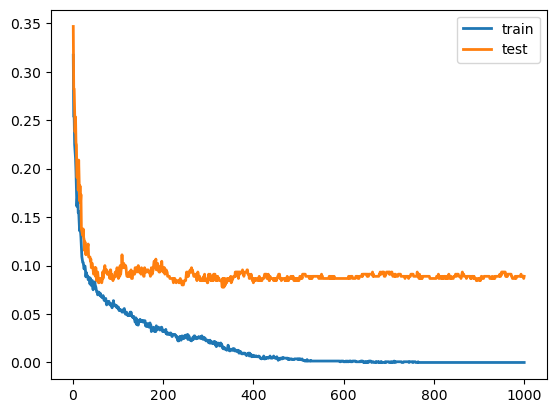

In [4]:
n_estimators=1000
clf = AdaBoostClassifier(n_estimators=n_estimators)
run(clf, X_train, X_test, y_train, y_test)

**Base learner:** Decision Trees of depth 5

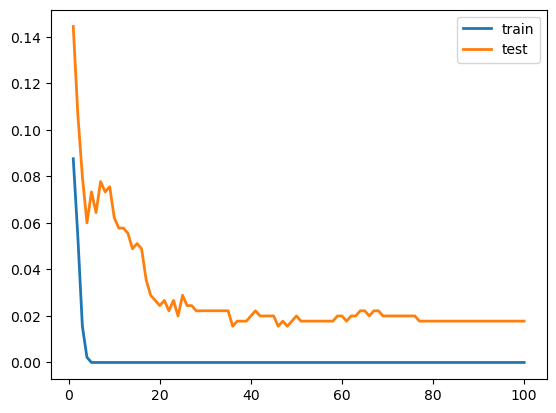

In [5]:
n_estimators=100
base_clf=DecisionTreeClassifier(max_depth=5) 
clf = AdaBoostClassifier(estimator=base_clf, n_estimators=n_estimators)
run(clf, X_train, X_test, y_train, y_test)

---
### Cross-Validation Test

In [6]:
def run_cv(X, y, base_clf, n_estimators, cv):
    avg_err = np.zeros((len(base_clf), len(n_estimators)))
    std_err = np.zeros((len(base_clf), len(n_estimators)))
    for i, h in enumerate(base_clf.values()):
        for j, n in enumerate(n_estimators):
            clf = AdaBoostClassifier(estimator=h, n_estimators=n)
            scores = cross_val_score(clf, X, y, cv=cv)
            avg_err[i, j] = (1.-scores).mean()
            std_err[i, j] = (1.-scores).std()
    
    for i, depth in enumerate(base_clf):
        plt.plot(n_estimators, avg_err[i], lw=2, label=f'base {depth:d}')
    plt.legend()
    plt.show()

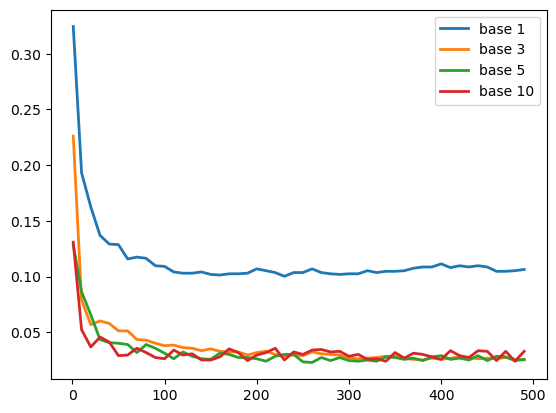

In [7]:
n_estimators = np.arange(0, 500, 10)
depth = [1, 3, 5, 10]
n_estimators[0] = 1
base_learners = {}
for d in depth:
    base_learners[d] = DecisionTreeClassifier(max_depth=d)
run_cv(X, y, base_learners, n_estimators, cv=10)